# Loading the Data

Loading the data with help of the `ExperimentDataLoaderWidget`. 

You can select which experiments to load, define a different name (the 'name' field, not the 'short name' field) and resort the data. The name and the order of the experiments influence the legends of the plots.

Here we also compute an extra statistic, the total reward of each experiment / repetition, using the custom `cal_total_reward` function.

You have to press the 'Load Data' button to load the data.

If you don't see a table with the experiments, then you might not have installed the required qgrid widget. Please see the installation instructions on the main page of the exputils. 

In [1]:
# load data

# import the experiment utilities package
import exputils as eu
import numpy as np

def cal_total_reward(event_descr):
    
    experiment_data = event_descr['owner'].experiment_data
    
    for single_exp_data in experiment_data.values():
        for single_rep_data in single_exp_data.repetition_data.values():
            
            single_rep_data.total_reward = np.nansum(single_rep_data.reward_per_episode)     



# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget()

# add calculatation of extra statistics 
#experiment_data_loader.on_experiment_data_loaded(cal_total_reward)

display(experiment_data_loader)
experiment_data_loader.load_data()

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

Output()

We can access the data via the `experiment_data` property of the `ExperimentDataLoaderWidget`.

The data is composed of dictionaries that hold the individual data for each repetition.

# Plotting the Data

The exputils have several builtin plotting functions. These can be accessed via the `ExperimentDataPlotSelectionWidget`.

Write in the 'Data Sources' field which data you would like to plot. Then you can select a plotting function and change its configuration.

Examples: 
 * plotting the 'reward_per_episode' with the 'plotly_meanstd_scatter' plotter shows the performance of each experiment in a line graph
 * plotting the 'total_reward' with the 'plotly_box' or 'plotly_meanstd_bar' compares the total reward that was collected during each reward
 
If you want to 'save' a plot, to use it later again, then use the code production to generate a cell below the `ExperimentDataPlotSelectionWidget` that has the code to plot the figure again. The cells in the subchapters 'Total Reward' and 'Reward per Episode' at the end of this notebook were generated by this method. After saving the jupyter notebook all your configurations will be saved.

In [2]:
# experiment data selection plotter that takes as input the data loader to plot its loaded data
experiment_data_plotter = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(experiment_data_loader)
display(experiment_data_plotter)

ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Data Sources:', layout=Layout(min_widt…

Output()

## Mean value

odict_keys(['000001', '000002', '000003', '000004', '000005', '000006', '000007', '000008', '000009', '000010'])


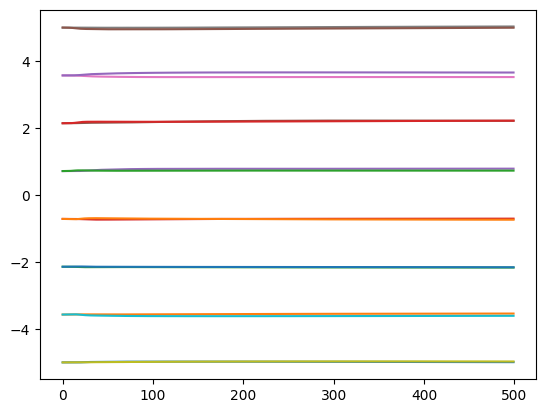

In [17]:
import matplotlib.pyplot as plt


print(experiment_data_loader.experiment_data.keys())

means = experiment_data_loader.experiment_data['000003']['repetition_data'][3]['means']
x = range(means.shape[0])

for y in range(means.shape[1]):
    mean = means[:,y]
    plt.plot(x, mean)
    #plt.show()

